## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred1 = classifier.predict(X_test)
pred_prob1 = classifier.predict_proba(X_test)

## K Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_class.fit(X_train, y_train)

y_pred2 = knn_class.predict(X_test)
pred_prob2 = knn_class.predict_proba(X_test)

## Making the Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
# Accuracy of the model
print("Logistic_regression :",accuracy_score(y_test, y_pred1))

[[65  3]
 [ 8 24]]
Logistic_regression : 0.89


In [31]:
cm = confusion_matrix(y_test, y_pred2)
print(cm)
# Accuracy of the model
print("KNN :",accuracy_score(y_test, y_pred2))

[[64  4]
 [ 3 29]]
KNN : 0.93


### Elbow method for selecting 'k' value

Text(0, 0.5, 'error_rate')

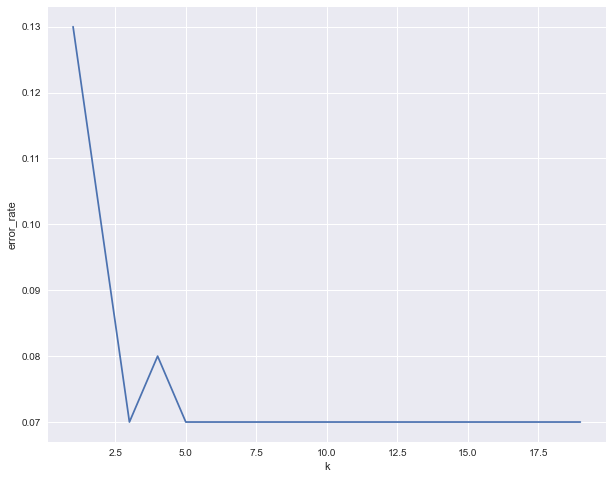

In [48]:
error_rate = []
for i in range(1,20):
    knn1 = KNeighborsClassifier(n_neighbors = i)
    knn1.fit(X_train,y_train)
    knn1_prediction = knn1.predict(X_test)
    error_rate.append(round(1-(accuracy_score(y_test,knn1_prediction)),4))
    
plt.figure(figsize=(10,8))
plt.plot(range(1,20),error_rate)
plt.xlabel('k')
plt.ylabel('error_rate')

## ROC-AUC

In [41]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [45]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print("roc_auc_score for logistic regression: ",round(auc_score1,3),"\n roc_auc_score for KNN: ", round(auc_score2,3))

roc_auc_score for logistic regression:  0.954 
 roc_auc_score for KNN:  0.963


## Visualising ROC-AUC curve
Depending on how many incorrectly classified points we want to tolerate for our classifier, we would select the threshold for our model.

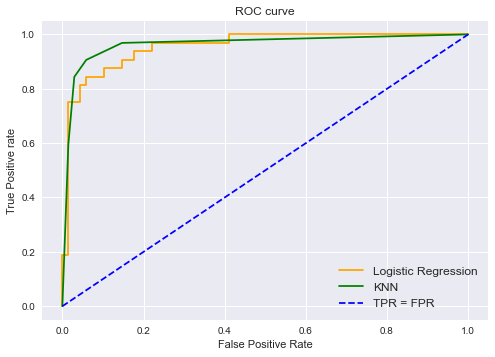

In [54]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label = 'TPR = FPR')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right', fontsize = 'large')
plt.show();